### Loan Prediction


In [1]:
# importing necessary libraries
import pandas as pd


In [2]:
loan_file=pd.read_csv("/Users/karanbudhaair/Downloads/Projects/loan_prediction.csv")
loan_file

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [3]:
# Overview of the data set
loan_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [4]:
loan_file.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [52]:
# Checking null and duplicate values
loan_file.isna().sum()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [86]:
duplicate_data=loan_file.loc[loan_file.duplicated(subset=["LoanAmount","ApplicantIncome"]),["LoanAmount","ApplicantIncome"]]

dupliacte_data

,LoanAmount,ApplicantIncome
195,116.0,5833


In [87]:
# since the another duplicate row can be any where in the data frame
# comparision is always between same dimension or eligible to broadcast(strechable )
row= loan_file.loc[195,["LoanAmount","ApplicantIncome"]]
row

LoanAmount         116.0
ApplicantIncome     5833
Name: 195, dtype: object

In [91]:
all_duplicate_data=loan_file[(loan_file["LoanAmount"]==row["LoanAmount"]) & (loan_file["ApplicantIncome"]==row["ApplicantIncome"]) ]
all_duplicate_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
38,LP001211,Male,No,0,Graduate,Yes,5833,0,116.0,360.0,1.0,Urban
195,LP002083,Male,No,0,Graduate,Yes,5833,0,116.0,360.0,1.0,Urban


In [98]:
loan_file.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
362,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,True,False
365,False,False,False,False,False,False,False,False,False,False,False,False


In [106]:
null_data=loan_file.loc[loan_file.isna().any(axis=1),:]
null_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
11,LP001082,Male,Yes,1,Graduate,NaN,2185,1516,162.0,360.0,1.0,Semiurban
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
336,LP002853,Female,No,0,Not Graduate,No,3015,2000,145.0,360.0,NaN,Urban
351,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,NaN,Rural
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0,76.0,360.0,NaN,Rural
360,LP002965,Female,Yes,0,Graduate,No,8550,4255,96.0,360.0,NaN,Urban


In [113]:
# Next task is finding the particular column where data in null in the specified column
# What value can it be replaced with


True

In [220]:
def null_value_information(data_column):
      
     return data_column[pd.isna(data_column)] 

null_data_to_fill=null_data.apply(lambda data_column: null_value_information(data_column))
print(null_data_to_fill.isna().sum())

Loan_ID              78
Gender               78
Married              78
Dependents           78
Education            78
Self_Employed        78
ApplicantIncome      78
CoapplicantIncome    78
LoanAmount           78
Loan_Amount_Term     78
Credit_History       78
Property_Area        78
dtype: int64


0     LP001035
1     LP001059
2     LP001082
3     LP001083
4     LP001094
        ...   
73    LP002853
74    LP002901
75    LP002954
76    LP002965
77    LP002980
Name: Loan_ID, Length: 78, dtype: object
0       Male
1       Male
2       Male
3       Male
4       Male
       ...  
73    Female
74      Male
75      Male
76    Female
77      Male
Name: Gender, Length: 78, dtype: object
0     Yes
1     Yes
2     Yes
3      No
4     Yes
     ... 
73     No
74     No
75    Yes
76    Yes
77     No
Name: Married, Length: 78, dtype: object
0      2
1      2
2      1
3     3+
4      2
      ..
73     0
74     0
75     2
76     0
77     0
Name: Dependents, Length: 78, dtype: object
0         Graduate
1         Graduate
2         Graduate
3         Graduate
4         Graduate
          ...     
73    Not Graduate
74        Graduate
75    Not Graduate
76        Graduate
77        Graduate
Name: Education, Length: 78, dtype: object
0      No
1     NaN
2     NaN
3      No
4     NaN
     ... 
73   

In [206]:
null_data.reset_index(drop=True, inplace=True)

In [ ]:
null_data["Self_Employed"]

In [205]:
null_data["Self_Employed"][null_data["Self_Employed"].apply(lambda x: pd.isna(x))]

1     NaN
2     NaN
4     NaN
8     NaN
14    NaN
16    NaN
28    NaN
30    NaN
32    NaN
33    NaN
39    NaN
45    NaN
49    NaN
50    NaN
53    NaN
54    NaN
57    NaN
59    NaN
61    NaN
63    NaN
64    NaN
70    NaN
71    NaN
Name: Self_Employed, dtype: object

In [212]:
def null_value_information(data_column):
    return data_column[pd.isna(data_column)]

null_info = null_data.apply(lambda col: null_value_information(col))
print(null_info)


   Loan_ID Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0      NaN    NaN     NaN        NaN       NaN           NaN              NaN   
1      NaN    NaN     NaN        NaN       NaN           NaN              NaN   
2      NaN    NaN     NaN        NaN       NaN           NaN              NaN   
3      NaN    NaN     NaN        NaN       NaN           NaN              NaN   
4      NaN    NaN     NaN        NaN       NaN           NaN              NaN   
..     ...    ...     ...        ...       ...           ...              ...   
73     NaN    NaN     NaN        NaN       NaN           NaN              NaN   
74     NaN    NaN     NaN        NaN       NaN           NaN              NaN   
75     NaN    NaN     NaN        NaN       NaN           NaN              NaN   
76     NaN    NaN     NaN        NaN       NaN           NaN              NaN   
77     NaN    NaN     NaN        NaN       NaN           NaN              NaN   

    CoapplicantIncome  Loan

In [216]:
def null_value_information(col):
    return col[col.isna()]

null_data_to_fill = null_data.apply(null_value_information)
print(null_data_to_fill)


   Loan_ID Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0      NaN    NaN     NaN        NaN       NaN           NaN              NaN   
1      NaN    NaN     NaN        NaN       NaN           NaN              NaN   
2      NaN    NaN     NaN        NaN       NaN           NaN              NaN   
3      NaN    NaN     NaN        NaN       NaN           NaN              NaN   
4      NaN    NaN     NaN        NaN       NaN           NaN              NaN   
..     ...    ...     ...        ...       ...           ...              ...   
73     NaN    NaN     NaN        NaN       NaN           NaN              NaN   
74     NaN    NaN     NaN        NaN       NaN           NaN              NaN   
75     NaN    NaN     NaN        NaN       NaN           NaN              NaN   
76     NaN    NaN     NaN        NaN       NaN           NaN              NaN   
77     NaN    NaN     NaN        NaN       NaN           NaN              NaN   

    CoapplicantIncome  Loan

In [221]:
for i in range(1,10):
    print("It is possible:")

It is possible:
It is possible:
It is possible:
It is possible:
It is possible:
It is possible:
It is possible:
It is possible:
It is possible:


In [388]:
null_value_data_frame={"column_name":[], "indexes":[], 'total':0}
null_value_data_frame=pd.DataFrame(null_value_data_frame)
null_value_data_frame

,column_name,indexes,total


In [389]:
null_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
1,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
2,LP001082,Male,Yes,1,Graduate,NaN,2185,1516,162.0,360.0,1.0,Semiurban
3,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban
4,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban


In [390]:
def null_meta_data(col):
    
    
    meta_data=col[col.apply(lambda x: pd.isna(x)) ]
    column_name=meta_data.name
    indexs=list(meta_data.index)
    return indexs
    
 
    

In [391]:
null_meta=null_data.apply(null_meta_data)
null_meta


Loan_ID                                                             []
Gender                     [5, 12, 21, 26, 41, 44, 46, 55, 62, 66, 69]
Married                                                             []
Dependents                    [10, 13, 22, 26, 40, 47, 48, 52, 65, 68]
Education                                                           []
Self_Employed        [1, 2, 4, 8, 14, 16, 28, 30, 32, 33, 39, 45, 4...
ApplicantIncome                                                     []
CoapplicantIncome                                                   []
LoanAmount                                        [15, 19, 38, 47, 60]
Loan_Amount_Term                               [9, 11, 24, 25, 36, 42]
Credit_History       [0, 3, 6, 7, 9, 17, 18, 20, 23, 27, 29, 31, 34...
Property_Area                                                       []
dtype: object

In [392]:
null_value_data_frame["column_name"]=pd.Series(list(null_meta.index))

null_value_data_frame["indexes"]=pd.Series(list(null_meta.values))

In [395]:
null_value_data_frame["total"]=null_value_data_frame["indexes"].map(lambda x: len(x))
null_value_data_frame

,column_name,indexes,total
0,Loan_ID,[],0
1,Gender,"[5, 12, 21, 26, 41, 44, 46, 55, 62, 66, 69]",11
2,Married,[],0
3,Dependents,"[10, 13, 22, 26, 40, 47, 48, 52, 65, 68]",10
4,Education,[],0
5,Self_Employed,"[1, 2, 4, 8, 14, 16, 28, 30, 32, 33, 39, 45, 4...",23
6,ApplicantIncome,[],0
7,CoapplicantIncome,[],0
8,LoanAmount,"[15, 19, 38, 47, 60]",5
9,Loan_Amount_Term,"[9, 11, 24, 25, 36, 42]",6


In [ ]:
# Let us find the value below or above or if numeric let us find the suitable value to fill


In [416]:
#[  loan_file["Gender"][item-1] for null_index_list in null_value_data_frame["indexes"]  for item in null_index_list if (item>=1 & (not pd.isna(loan_file["Gender"][item]))) ]

In [422]:
def null_value_inforamation(index):
    if len(index)>=1:
        return [item-1 for item in index]
    

value_to_replace_with=null_value_data_frame["indexes"].apply(null_value_inforamation)
value_to_replace_with.index=null_value_data_frame["column_name"]
value_to_replace_with

column_name
Loan_ID                                                           None
Gender                     [4, 11, 20, 25, 40, 43, 45, 54, 61, 65, 68]
Married                                                           None
Dependents                     [9, 12, 21, 25, 39, 46, 47, 51, 64, 67]
Education                                                         None
Self_Employed        [0, 1, 3, 7, 13, 15, 27, 29, 31, 32, 38, 44, 4...
ApplicantIncome                                                   None
CoapplicantIncome                                                 None
LoanAmount                                        [14, 18, 37, 46, 59]
Loan_Amount_Term                               [8, 10, 23, 24, 35, 41]
Credit_History       [-1, 2, 5, 6, 8, 16, 17, 19, 22, 26, 28, 30, 3...
Property_Area                                                     None
Name: indexes, dtype: object

In [423]:

loan_file.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
# THere are a lot of ways we can fill the null value based on distribution and outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x13f87c170>,
 'caps': [<matplotlib.lines.Line2D at 0x13f87ca70>,
 'boxes': [<matplotlib.lines.Line2D at 0x13f87c0e0>],
 'medians': [<matplotlib.lines.Line2D at 0x13f87d220>],
 'fliers': [<matplotlib.lines.Line2D at 0x13f87d4c0>],
 'means': []}

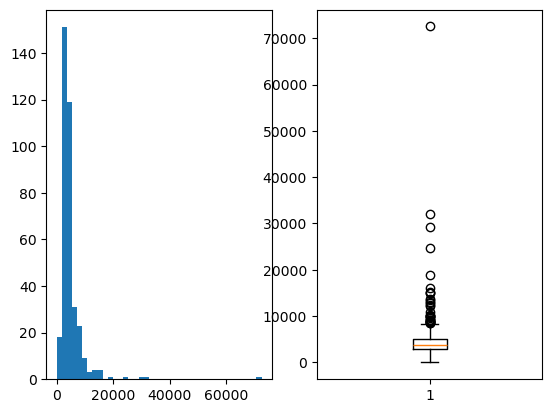

In [453]:
from matplotlib import pyplot as plt
fig,axes=plt.subplots(1,2)

columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
axes[0].hist(loan_file[columns[0]], bins=40)
axes[1].boxplot(loan_file[columns[0]])

In [459]:
#since too many outlier, so we will go with median for na values to replace in
# applicantIncome
null_summary=loan_file.isna().sum()
null_summary

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [485]:
null_column=list(null_summary[null_summary>0].index)
null_column

['Gender',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [574]:
gender=loan_file["Gender"].value_counts()
dependants=loan_file["Dependents"].value_counts()
self_employed=loan_file["Self_Employed"].value_counts()
loanAmount=loan_file["LoanAmount"].value_counts()
print(pd.concat([gender,dependants,self_employed,loanAmount], axis=1))

        count  count  count  count
Male    286.0    NaN    NaN    NaN
Female   70.0    NaN    NaN    NaN
0         NaN  200.0    NaN    NaN
2         NaN   59.0    NaN    NaN
1         NaN   58.0    NaN    NaN
...       ...    ...    ...    ...
71.0      NaN    NaN    NaN    1.0
157.0     NaN    NaN    NaN    1.0
93.0      NaN    NaN    NaN    1.0
61.0      NaN    NaN    NaN    1.0
98.0      NaN    NaN    NaN    1.0

[152 rows x 4 columns]


In [577]:
pd.concat([pd.Series(), gender], axis=1)

,0,count
Male,NaN,286
Female,NaN,70


In [627]:




all_counts=[]

new_file=loan_file[null_column]
for col in new_file.columns:
     values= pd.DataFrame(new_file[col].value_counts().sort_values(ascending=False))
     values["Column"]=col
     values["value"]=values.index
     values.reset_index(drop=True, inplace=True)
     all_counts.append(values)
   
final_df=pd.concat(all_counts, ignore_index=True)
final_df

,count,Column,value
0,286,Gender,Male
1,70,Gender,Female
2,200,Dependents,0
3,59,Dependents,2
4,58,Dependents,1
...,...,...,...
161,1,Loan_Amount_Term,36.0
162,1,Loan_Amount_Term,120.0
163,1,Loan_Amount_Term,6.0
164,279,Credit_History,1.0


In [610]:
null_column

['Gender',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [632]:
a=new_file["LoanAmount"].value_counts().sort_values(ascending=False)
a= a.reset_index()
a[:5]

,LoanAmount,count
0,150.0,12
1,125.0,11
2,110.0,10
3,100.0,9
4,90.0,9


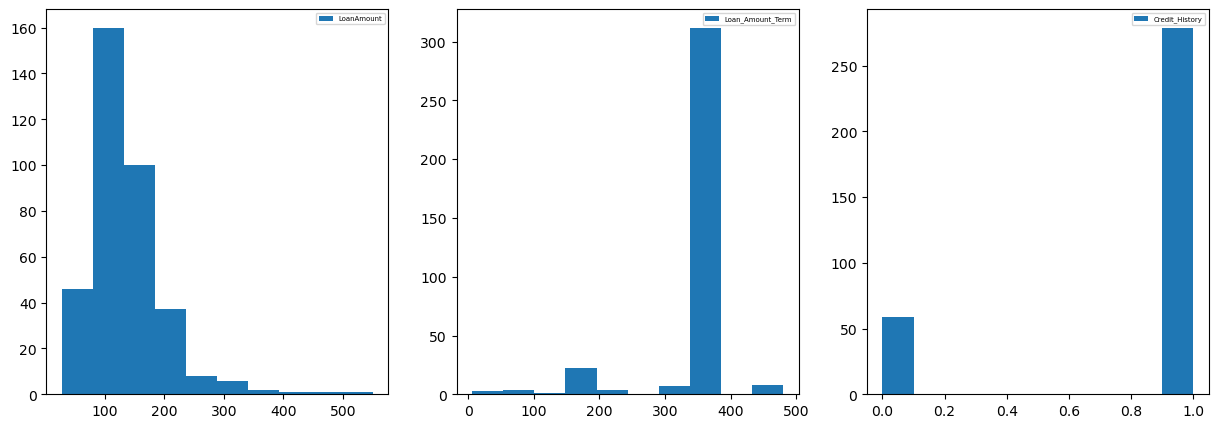

In [677]:
#columns=[['Gender','Dependents','Self_Employed'],['LoanAmount','Loan_Amount_Term','Credit_History']]
columns=["LoanAmount",	"Loan_Amount_Term"	,"Credit_History"]
fig,axes=plt.subplots(1,3,figsize=(15, 5))

for i,items in enumerate(columns):
    
        axes[i].hist(loan_file[items], bins=10, label=items)
        axes[i].legend(fontsize=5)

plt.show()
        

In [ ]:
# we will take median for above columns to fill na since skew
# for others like categorical value we will take mode